In [0]:
 import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras import optimizers

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Get the image array, its label and its category
pickle_in = open("/content/drive/My Drive/CSC480CharNN/X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/CSC480CharNN/y.pickle", "rb")
y = pickle.load(pickle_in)
y = np.array(y)[np.newaxis].T

pickle_in = open("/content/drive/My Drive/CSC480CharNN/CATEGORIES.pickle", "rb")
CATEGORIES = pickle.load(pickle_in)

In [0]:
print ("X.shape", X.shape)
print ("y.shape", y.shape)

X.shape (143115, 32, 32, 1)
y.shape (143115, 1)


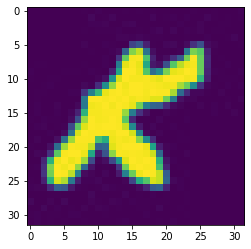

'K'

In [0]:
#Display sample image with its label

plt.imshow(X[888][:,:,-1])
plt.show()

CATEGORIES[y[888][0]]

In [0]:
#Normalize data
X = X/255.0

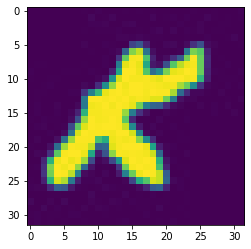

'K'

In [0]:
#Display sample image with its label - After normalizing image

plt.imshow(X[888][:,:,-1])
plt.show()

CATEGORIES[y[888][0]]

In [0]:
#Train Model

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(len(CATEGORIES)))
model.add(Activation('sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", 
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=512, epochs = 3, validation_split=0.1)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 128803 samples, validate on 14312 samples
Epoch 1/3
128803/128803 [==============================] - 227s 2ms/sample - loss: 0.8135 - acc: 0.7644 - val_loss: 0.3619 - val_acc: 0.8893
Epoch 2/3
128803/128803 [==============================] - 227s 2ms/sample - loss: 0.3018 - acc: 0.9047 - val_loss: 0.2678 - val_acc: 0.9148
Epoch 3/3
128803/128803 [==============================] - 228s 2ms/sample - loss: 0.2425 - acc: 0.9216 - val_loss: 0.2382 - val_acc: 0.9233


In [0]:
model.save('/content/drive/My Drive/CSC480CharNN/char_reader.model')

In [0]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/CSC480CharNN/char_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Get an image with a single number and store it as an array

import cv2
import matplotlib.pyplot as plt

IMG_PATH = "/content/drive/My Drive/CSC480CharNN/"
imageName = "letterX.png"

IMG_SIZE = 32
image_array = []

def create_image_array():
    filepath = IMG_PATH + imageName  
        
    try:
      img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      image_array.append([new_array])
    except Exception as e:
      print("ERROR:", e)
      return(e)

create_image_array()

(1, 32, 32, 1)


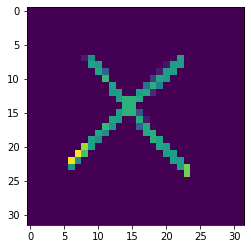

In [0]:
#Convert to list to numpy array
image_array = np.array(image_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

#Invert colors to match training images
image_array[0,:,:,-1] = np.invert(image_array[0,:,:,-1])

#Normalize data
image_array = tf.keras.utils.normalize(image_array, axis=1) 

print(image_array.shape)

plt.imshow(image_array[0][:,:,-1]) #,cmap=plt.cm.binary
plt.show()

In [0]:
#Show predicted character

pred = new_model.predict(image_array)
print(CATEGORIES[np.argmax(pred[0])])

X


In [0]:
#Display probability distribution

percentage = []
top5 = np.argsort(pred[0])[::-1][:5]
for i in range(len(top5)):
  prob = pred[0][top5[i]]
  total = np.sum(pred[0])
  percentage = prob/total * 100
  print(round(percentage, 2), "% - ", CATEGORIES[top5[i]])

53.08 % -  X
21.32 % -  2
11.93 % -  H
5.96 % -  1
2.4 % -  T
